In [1]:
!conda install -c conda-forge  BeautifulSoup4 --yes
!conda install -c conda-forge lxml --yes


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge
    soupsieve-2.0.1            |   py36h9f0ad1d_0          56 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         219 KB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.1-py36h9f0ad1d_0
  soupsieve          conda-forge/linux-64::soupsieve-2.0.1-py36h9f0ad1d_0



beautifulsoup4-4.9.1 | 163 KB    | ##################################### | 100% 
soupsieve-2.0.1      | 56 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction

In [2]:
import pandas as pd 
import requests
from IPython.display import display_html
from bs4 import BeautifulSoup
import lxml

In [3]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
# 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import numpy as np # library to handle data in a vectorized manner

#Get the neighborhood's latitude and longitude values.

In [5]:
#address = 'William Pitt Union, PA' -correspondes to center of Pitt
address = 'William Pitt Union, PA'
geolocator = Nominatim(user_agent="Pittsurgh")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cathedral of Learning are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cathedral of Learning are 40.44338705, -79.95483922113664.


From Foursquare API College Residence Hall(dormitories included) ID is 4bf58dd8d48988d1a3941735

In [6]:
learn_latitude = latitude
learn_longitude = longitude

In [7]:
CLIENT_ID = 'XRI1TUU05CVBXPHM4L3WDKOYUFPCPQBRO2H2MEECLNJUROOZ' # your Foursquare ID
CLIENT_SECRET = 'KQIJMAWGO4GTL0VGSXBQ1VHM0FCHZRZOLHP54PQYKIAFC2SZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XRI1TUU05CVBXPHM4L3WDKOYUFPCPQBRO2H2MEECLNJUROOZ
CLIENT_SECRET:KQIJMAWGO4GTL0VGSXBQ1VHM0FCHZRZOLHP54PQYKIAFC2SZ


In [8]:
# Now, let's get the top 50 venues that are in Marble Hill within a radius of 700 meters. urL and request
LIMIT = 30 # limit of number of venues returned by Foursquare API
radius = 700 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d1a3941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    learn_latitude, 
    learn_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XRI1TUU05CVBXPHM4L3WDKOYUFPCPQBRO2H2MEECLNJUROOZ&client_secret=KQIJMAWGO4GTL0VGSXBQ1VHM0FCHZRZOLHP54PQYKIAFC2SZ&v=20180605&ll=40.44338705,-79.95483922113664&radius=700&limit=30&categoryId=4bf58dd8d48988d1a3941735'

In [9]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1e3926a2bad162cfc0fee9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'North Oakland',
  'headerFullLocation': 'North Oakland, Pittsburgh',
  'headerLocationGranularity': 'neighborhood',
  'query': 'residence hall',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 40.44968705630001,
    'lng': -79.94657660270683},
   'sw': {'lat': 40.43708704369999, 'lng': -79.96310183956645}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bca2dd2b6c49c7430f88f91',
       'name': 'McCormick Hall',
       'location': {'address': 'Fifth Ave.',
        'crossStreet': 'Thackeray',
        'lat': 40.44341075236427,
        'lng': -79.95555774356377,


Research category type

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
from pandas.io.json import json_normalize

In [12]:
#clean and structure to data frame
venues = results['response']['groups'][0]['items']
pittdrm = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
pittdrm = pittdrm.loc[:, filtered_columns]

# filter the category for each row
pittdrm['venue.categories'] = pittdrm.apply(get_category_type, axis=1)

# clean columns
pittdrm.columns = [col.split(".")[-1] for col in pittdrm.columns]

pittdrm #.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,McCormick Hall,College Residence Hall,40.443411,-79.955558
1,Brackenridge Hall,College Residence Hall,40.442750,-79.955621
2,Tower B,College Residence Hall,40.442646,-79.956460
3,Holland Hall,College Residence Hall,40.442961,-79.956372
4,Tower A,College Residence Hall,40.442938,-79.956279
5,Tower C,College Residence Hall,40.442491,-79.956645
6,Litchfield Towers,College Residence Hall,40.442729,-79.956386
7,Bruce Hall,College Residence Hall,40.442819,-79.955139
8,Schenley Quadrangle,College Residence Hall,40.443232,-79.955696
9,Lothrop Hall,College Residence Hall,40.442019,-79.959884


In [13]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import k-means from clustering stage
from sklearn.datasets.samples_generator import make_blobs

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [14]:
map_Pitt = folium.Map(location=[learn_latitude, learn_longitude], zoom_start=100)
 
# add markers to map
for lat, lng, name in zip(pittdrm['lat'], pittdrm['lng'], pittdrm['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Pitt)  
    
map_Pitt

In [15]:
#addressCM = 'Jared L. Cohon University Center, PA'
addressCM = 'Carnegie Mellon University, PA'
geolocator = Nominatim(user_agent="Pittsurgh")
cmloc = geolocator.geocode(addressCM)

cmlati = cmloc.latitude
cmlongi = cmloc.longitude
print('The geograpical coordinate of Carnegie Mellon Universit {}, {}.'.format(cmlati, cmlongi))

The geograpical coordinate of Carnegie Mellon Universit 40.4441619, -79.942728259225.


Now we need to create clusters 

In [16]:
# Now, let's get the top 50 venues that are in Marble Hill within a radius of 500 meters. urL and request
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 700 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d1a3941735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    cmlati, 
    cmlongi, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XRI1TUU05CVBXPHM4L3WDKOYUFPCPQBRO2H2MEECLNJUROOZ&client_secret=KQIJMAWGO4GTL0VGSXBQ1VHM0FCHZRZOLHP54PQYKIAFC2SZ&v=20180605&ll=40.4441619,-79.942728259225&radius=700&limit=50&categoryId=4bf58dd8d48988d1a3941735'

In [17]:
results_CM = requests.get(url).json()
results_CM

{'meta': {'code': 200, 'requestId': '5f1e39923c3b6c5758d99e66'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Pittsburgh',
  'headerFullLocation': 'Pittsburgh',
  'headerLocationGranularity': 'city',
  'query': 'residence hall',
  'totalResults': 14,
  'suggestedBounds': {'ne': {'lat': 40.450461906300006,
    'lng': -79.93446554554828},
   'sw': {'lat': 40.43786189369999, 'lng': -79.95099097290174}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b47f073f964a5208d4426e3',
       'name': 'Morewood Gardens',
       'location': {'address': '1060 Morewood Ave',
        'crossStreet': 'at Carnegie Mellon University',
        'lat': 40.44538970750714,
        'lng': -79.943276675246

Research category type

In [18]:
#clean and structure to data frame
venue = results_CM['response']['groups'][0]['items']
cmdrm = json_normalize(venue) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
cmdrm = cmdrm.loc[:, filtered_columns]

# filter the category for each row
cmdrm['venue.categories'] = cmdrm.apply(get_category_type, axis=1)

# clean columns
cmdrm.columns = [col.split(".")[-1] for col in cmdrm.columns]

cmdrm #.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Morewood Gardens,College Residence Hall,40.445390,-79.943277
1,Morewood E-Tower,College Residence Hall,40.445038,-79.943437
2,Stever House,College Residence Hall,40.446187,-79.942580
3,West Wing House,College Residence Hall,40.442595,-79.940670
4,Resnik House,College Residence Hall,40.442561,-79.940064
5,Doherty Apartments,College Residence Hall,40.444345,-79.939204
6,Mudge House,College Residence Hall,40.446924,-79.942503
7,Donner House,College Residence Hall,40.442028,-79.940127
8,Scobell House,College Residence Hall,40.441373,-79.939551
9,Hamerschlag House,College Residence Hall,40.441358,-79.938991


In [19]:
map_CM = folium.Map(location=[cmlati, cmlongi], zoom_start=100)
 
# add markers to map
for lat, lng, name in zip(cmdrm['lat'], cmdrm['lng'], cmdrm['name']):
    labelc = '{}'.format(name)
    labelc = folium.Popup(labelc, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=labelc,
        color='orange',
        fill=True,
        fill_color='#cc8631',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CM)  
    
map_CM

In [20]:
type(cmdrm)

pandas.core.frame.DataFrame

It is unreasonable to calculate distance from each dorm to store in our group of interest.  However for each selected university dorms are spreaded across large area and overlaping. In this case it is possible to exercise standart solution - make few clusters for combined (Pittsburgh University and Carnegie-Mellon University). Serveral options have been investigated Number of clusters = {3, 4, 5 }. 


Make clusters (find centroids for apartment clusters)

In [21]:
#Pittsburgh

#for lat, lng, name in zip(cmdrm['lat'], cmdrm['lng'], cmdrm['name']):
#    labelc = '{}'.format(name)
#    labelc = folium.Popup(labelc, parse_html=True)
#    folium.CircleMarker(
#        [lat, lng],
#        radius=5,
#        popup=labelc,
#        color='orange',
#        fill=True,
#        fill_color='#cc8631',
#        fill_opacity=0.7,
#        parse_html=False).add_to(map_CM)  
      
f1 = cmdrm['lat'].values  
fp1 = pittdrm['lat'].values
fc1 = np.concatenate((f1, fp1))
   #f2 = cmdrm['l'].values 
f2 = cmdrm['lng'].values
fp2 = pittdrm['lng'].values
fc2 = np.concatenate((f2, fp2))
fc2



array([-79.94327668, -79.94343655, -79.94258018, -79.94066975,
       -79.94006407, -79.93920384, -79.94250347, -79.94012737,
       -79.939551  , -79.93899062, -79.93847773, -79.946783  ,
       -79.93875056, -79.93868498, -79.95555774, -79.95562077,
       -79.95645954, -79.95637163, -79.95627923, -79.95664496,
       -79.9563863 , -79.95513888, -79.95569587, -79.95988373,
       -79.95246802, -79.95888046, -79.96047315, -79.95125264,
       -79.96139351])

In [22]:
#Now do simple thing. Select cluster number  (4) to generate centers of dorm groups to calculate distance to nearby store 
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import pyplot as plt

In [23]:
#first deep copy -if we like to have a nice map
comb = pittdrm.copy()
#comb
#comb.add(cmdrm)
rescomb = comb.append(cmdrm, ignore_index=True, sort=False)
#frames = [comb, cmdrm]

#rescomb = pd.concat(frames)
rescomb


,name,categories,lat,lng
0,McCormick Hall,College Residence Hall,40.443411,-79.955558
1,Brackenridge Hall,College Residence Hall,40.442750,-79.955621
2,Tower B,College Residence Hall,40.442646,-79.956460
3,Holland Hall,College Residence Hall,40.442961,-79.956372
4,Tower A,College Residence Hall,40.442938,-79.956279
5,Tower C,College Residence Hall,40.442491,-79.956645
6,Litchfield Towers,College Residence Hall,40.442729,-79.956386
7,Bruce Hall,College Residence Hall,40.442819,-79.955139
8,Schenley Quadrangle,College Residence Hall,40.443232,-79.955696
9,Lothrop Hall,College Residence Hall,40.442019,-79.959884


In [24]:
map_CM = folium.Map(location=[cmlati, cmlongi], zoom_start=100)
#starting with Carnegie Mellon but showing all residential halls 
# add markers to map
for lat, lng, name in zip(rescomb['lat'], rescomb['lng'], rescomb['name']):
    labelc = '{}'.format(name)
    labelc = folium.Popup(labelc, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=labelc,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CM)  
    
map_CM



[[ 40.44356417 -79.9490209 ]]
 centroid for subclaster
[[ 40.44711053 -79.95016789]
 [ 40.44333467 -79.94048591]
 [ 40.44297529 -79.95729121]]


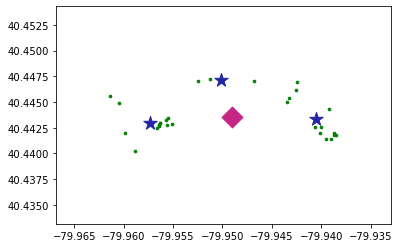

In [25]:
X = np.array(list(zip(rescomb.lat, rescomb.lng)))
plt.scatter(rescomb.lng, rescomb.lat, c='green', s=7)
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', s=200, c='#2525A5')
kmean1 = KMeans(n_clusters=1)
kmean1 = kmean1.fit(X)
centroid1 = kmean1.cluster_centers_
plt.scatter(centroid1[:, 1], centroid1[:, 0], marker='D', s=220, c='#C52585')
print(centroid1)
print(" centroid for subclaster")


print(centroids) # From sci-kit learn

#lt.scatter(, C_y, marker='*', s=200, c='g')p

First select interesting stores....e.g aldi Traders Joe, Asian local mom and pop.... seling vegieis
We can select it from Fouersquare documentation site to check all options

Fruit & Vegetable Store
52f2ab2ebcbc57f1066b8b1c

Garden Center
4eb1c0253b7b52c0e1adc2e9

Farmers Market
4bf58dd8d48988d1fa941735

Discount Store
52dea92d3cf9994f4e043dbb

Grocery Store
4bf58dd8d48988d118951735


Exercize foursquera to find all stores

In [26]:
latist = centroid1[0][0]
longist = centroid1[0][1]

Find distance from all stores to cluster centers 

In [28]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId=4bf58dd8d48988d118951735'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latist, 
    longist, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XRI1TUU05CVBXPHM4L3WDKOYUFPCPQBRO2H2MEECLNJUROOZ&client_secret=KQIJMAWGO4GTL0VGSXBQ1VHM0FCHZRZOLHP54PQYKIAFC2SZ&v=20180605&ll=40.44356417485097,-79.949020904632&radius=3000&limit=50&categoryId=4bf58dd8d48988d118951735'

In [29]:
results_SH = requests.get(url).json()
results_SH

{'meta': {'code': 200, 'requestId': '5f1e3c13e9e5125d4d7376d0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Pittsburgh',
  'headerFullLocation': 'Pittsburgh',
  'headerLocationGranularity': 'city',
  'query': 'grocery store',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': 40.470564201851,
    'lng': -79.91360958947969},
   'sw': {'lat': 40.41656414785094, 'lng': -79.9844322197843}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4df51533d22d8c5470e3594a',
       'name': 'Las Palmas 2',
       'location': {'address': '326 Atwood St',
        'lat': 40.43906305436817,
        'lng': -79.9551398604609,
        'labeledLatLngs': [{'label': 'display',
          'lat': 4

In [30]:
#clean and structure to data frame
venue = results_SH['response']['groups'][0]['items']
grshops = json_normalize(venue) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
grshops = grshops.loc[:, filtered_columns]

# filter the category for each row
grshops['venue.categories'] = grshops.apply(get_category_type, axis=1)

# clean columns
grshops.columns = [col.split(".")[-1] for col in grshops.columns]

grshops #.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Las Palmas 2,Grocery Store,40.439063,-79.955140
1,Kohli's Indian Groceries,Grocery Store,40.445130,-79.948601
2,Whole Foods Market,Grocery Store,40.458609,-79.928586
3,Seoul Mart,Grocery Store,40.447094,-79.947365
4,Bombay Food Market,Grocery Store,40.451990,-79.951784
5,ALDI,Grocery Store,40.458633,-79.935029
6,Forbes Street Market,Grocery Store,40.442890,-79.954950
7,Donatelli's Italian Food Center,Grocery Store,40.461919,-79.949446
8,Oakland Mini Market,Grocery Store,40.437229,-79.952629
9,ALDI,Grocery Store,40.426911,-79.967520


In [31]:
type(grshops)

pandas.core.frame.DataFrame

In [32]:
map_str = folium.Map(location=[latist, cmlongi], zoom_start=100)
 
# add markers to map
for lat, lng, name in zip(grshops['lat'], grshops['lng'], grshops['name']):
    labelst = '{}'.format(name)
    labelst = folium.Popup(labelst, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=labelst,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(map_str)  
    
map_str

In [33]:
def degreesToRadians(degrees) :
  return degrees * math.pi / 180.0


def distanceInKmBetweenEarthCoordinates(lat1, lon1, lat2, lon2) :
  earthRadiusKm = 6371.0;

  dLat = degreesToRadians(lat2-lat1);
  dLon = degreesToRadians(lon2-lon1);

  lat1 = degreesToRadians(lat1);
  lat2 = degreesToRadians(lat2);

  a = math.sin(dLat/2.0) * math.sin(dLat/2.0) + math.sin(dLon/2.0) * math.sin(dLon/2.0) * math.cos(lat1) * math.cos(lat2) 
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)) 
  return earthRadiusKm * c



In [34]:
import math

In [35]:
math.pi

3.141592653589793

In [36]:
# Now using defined functions 
dfstrdr = pd.DataFrame(columns=['Name', 'Distance 1', 'Distance 2', 'Distance 3' ])
earthRadiusKm = 6371;
drmclsz = len(centroids)
print(drmclsz)
ls1=[]
ls2=[]
ls3=[]
for i in range(len(grshops)) :
    #print(grshops.loc[i, "lat"], grshops.loc[i, "lng"])
    lats = grshops.loc[i, "lat"]
    lngs = grshops.loc[i, "lng"]
    Strname = grshops.loc[i, "name"]
#    for ik in range(drmclsz) : 
        #print(centroids[ik][0], centroids[ik][1])  
    s0 = distanceInKmBetweenEarthCoordinates(lats, lngs, centroids[0][0], centroids[0][1])
    ls1.append(s0)
    s1 = distanceInKmBetweenEarthCoordinates(lats, lngs, centroids[1][0], centroids[1][1])
    ls2.append(s1)
    s2 = distanceInKmBetweenEarthCoordinates(lats, lngs, centroids[2][0], centroids[2][1])
    ls3.append(s2)
# print(centroids[ik][0], centroids[ik][1], s0, s1, s2)
    dfstrdr = dfstrdr.append({'Name' : Strname, 'Distance 1' : s0, 'Distance 2'  : s1, 'Distance 3'  : s2}, ignore_index = True)
        #print(type(lats)) 

3


In [37]:
type(grshops)

pandas.core.frame.DataFrame

Now we are presenting histograms for 3 different  residential clusters.

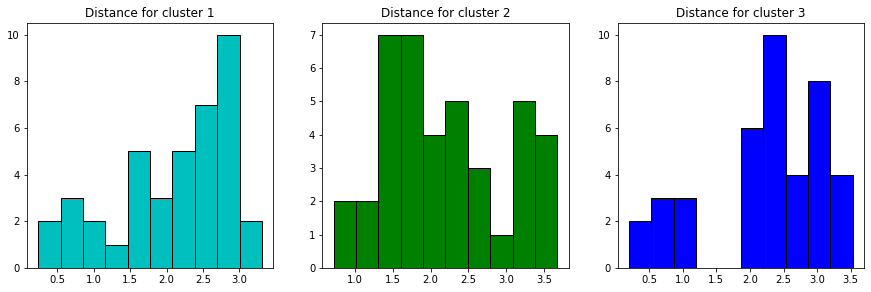

In [38]:
#fig= plt.figure(figsize=(20,5))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(ls1,10, histtype='bar', align='mid', color='c', label='Store Numbers', edgecolor='black')
ax1.set_title('Distance for cluster 1')
ax2.hist(ls2,10, histtype='bar', align='mid', color='g', label='Store Numbers', edgecolor='black')
ax2.set_title('Distance for cluster 2')
ax3.hist(ls3,10, histtype='bar', align='mid', color='b', label='Store Numbers', edgecolor='black')
ax3.set_title('Distance for cluster 3')
fig.set_size_inches(15., 4.5, forward=True)
#plt.title('Distance for second cluster')
plt.show()

In [39]:
 dfstrdr

,Name,Distance 1,Distance 2,Distance 3
0,Las Palmas 2,0.988822,1.327975,0.471583
1,Kohli's Indian Groceries,0.257046,0.715185,0.773415
2,Whole Foods Market,2.229191,1.974436,2.986873
3,Seoul Mart,0.237151,0.716726,0.956715
4,Bombay Food Market,0.559568,1.356590,1.105445
5,ALDI,1.811791,1.762701,2.565146
6,Forbes Street Market,0.619682,1.225021,0.198352
7,Donatelli's Italian Food Center,1.647775,2.201166,2.208588
8,Oakland Mini Market,1.118326,1.231662,0.750943
9,ALDI,2.683571,2.927489,1.984998
